In [1]:
import spacy
import scispacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.linking import EntityLinker
from scispacy.hyponym_detector import HyponymDetector
import pandas as pd
from spacy import displacy
import deplacy
import networkx as nx
from spacy.matcher import Matcher
import matplotlib.pyplot as plt

In [2]:
with open ("/Users/abhinavshinow/Documents/GitHub/Bert_Based_NER/Data_Collection/heart-data.txt","r") as f:
    text=f.read().replace("\n\n"," ").replace("\n"," ")
text=text[:1000000]

In [3]:
len(text)

1000000

In [4]:
nlp=spacy.load("en_core_sci_lg")

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_sci_lg' (0.4.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  raise FileNotFoundError(


In [5]:
nlp.add_pipe("abbreviation_detector")
nlp.add_pipe("hyponym_detector", last=True, config={"extended": False})
print(nlp.pipe_names)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer', 'parser', 'ner', 'abbreviation_detector', 'hyponym_detector']


In [6]:
doc=nlp(text)

In [34]:
for ent in doc.ents:
    print(ent)

Cardiovascular disease
CVD
diseases
heart
blood vessels
CVD
coronary artery diseases
CAD
angina
myocardial infarction
heart attack
CVDs
stroke
heart failure
hypertensive heart disease
rheumatic heart disease
cardiomyopathy
abnormal
congenital heart disease
valvular heart disease
carditis
aortic aneurysms
peripheral artery disease
thromboembolic disease
venous thrombosis
mechanisms
disease
Coronary artery disease
stroke
peripheral artery disease
atherosclerosis
high blood pressure
smoking
diabetes mellitus
lack
exercise
obesity
high blood cholesterol
poor diet
excessive
alcohol consumption
poor sleep
High blood pressure
CVD
deaths
tobacco
diabetes
lack
exercise
obesity
Rheumatic heart disease
untreated strep throat
CVD
preventable
Prevention
CVD
improving
risk factors
healthy eating
exercise
avoidance
tobacco smoke
alcohol intake
Treating
risk factors
high blood pressure
blood lipids
diabetes
Treating
people
strep throat
antibiotics
decrease
risk
rheumatic heart disease
aspirin
people
h

In [ ]:
html=displacy.render(doc,style="ent")

In [8]:
doc._.hearst_patterns

[('include', CVDs, stroke),
 ('include', CVDs, heart failure),
 ('include', CVDs, heart disease),
 ('include', CVDs, heart disease),
 ('include', CVDs, artery disease),
 ('include', CVDs, thrombosis),
 ('include', CVDs, cardiomyopathy),
 ('include', CVDs, heart rhythms),
 ('include', CVDs, heart disease),
 ('include', CVDs, carditis),
 ('include', CVDs, aneurysms),
 ('include', CVDs, disease),
 ('include', CVDs, heart disease),
 ('include', brain, stroke),
 ('such_as', risk factors, age),
 ('such_as', risk factors, sex),
 ('such_as', risk factors, predisposition),
 ('such_as', Sleep disorders, sleep),
 ('include', They, family history),
 ('include', They, artery calcification score),
 ('include', They, protein),
 ('include', They, pressure index),
 ('include', They, lipoprotein subclasses),
 ('include', They, particle concentration),
 ('such_as', diseases, smoking),
 ('such_as', diseases, diet),
 ('such_as', diseases, lifestyle),
 ('other', covariates, depression),
 ('such_as', health 

In [9]:
hyponyms=list(doc._.hearst_patterns)

In [11]:
sources=[str(source[1]) for source in hyponyms]
targets=[str(target[2]) for target in hyponyms]
relations=[str(relation[0]) for relation in hyponyms]

In [15]:
df=pd.DataFrame({'source-node':sources,'target-node':targets,'relation':relations})

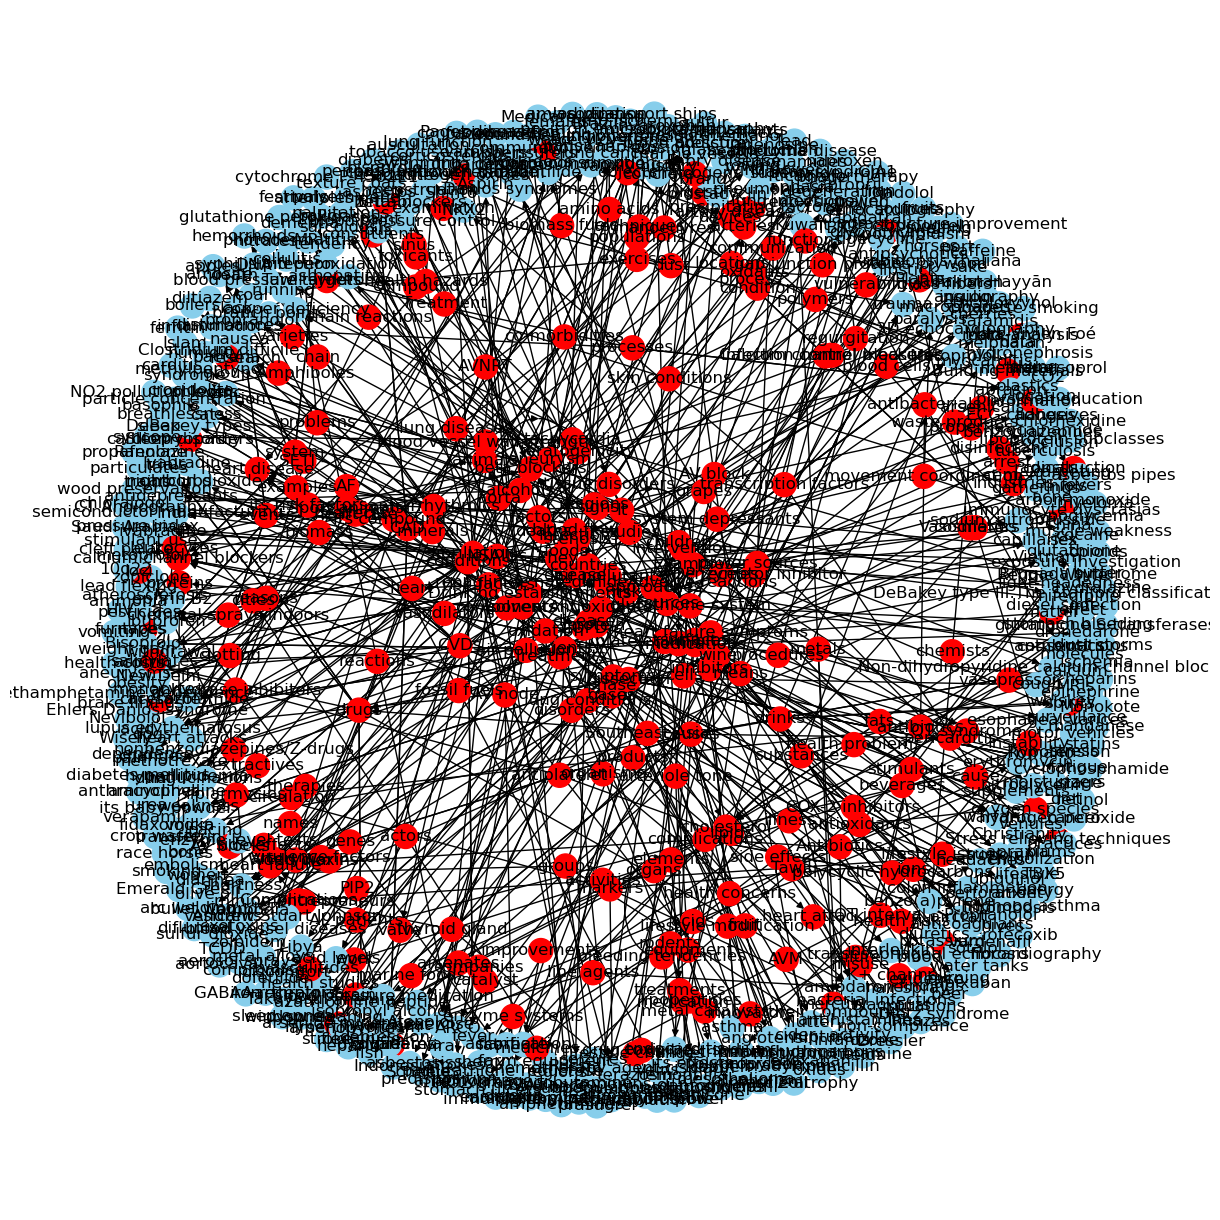

In [26]:
Knowledge_graph=nx.from_pandas_edgelist(df, 'source-node', 'target-node', edge_attr=True, create_using=nx.MultiDiGraph())
for n in Knowledge_graph.nodes():
    Knowledge_graph.nodes[n]['color'] = 'red' if n in sources else 'skyblue'

plt.figure(figsize=(12,12))
colors = [node[1]['color'] for node in Knowledge_graph.nodes(data=True)]
pos = nx.spring_layout(Knowledge_graph)
nx.draw(Knowledge_graph, with_labels=True, node_color=colors, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

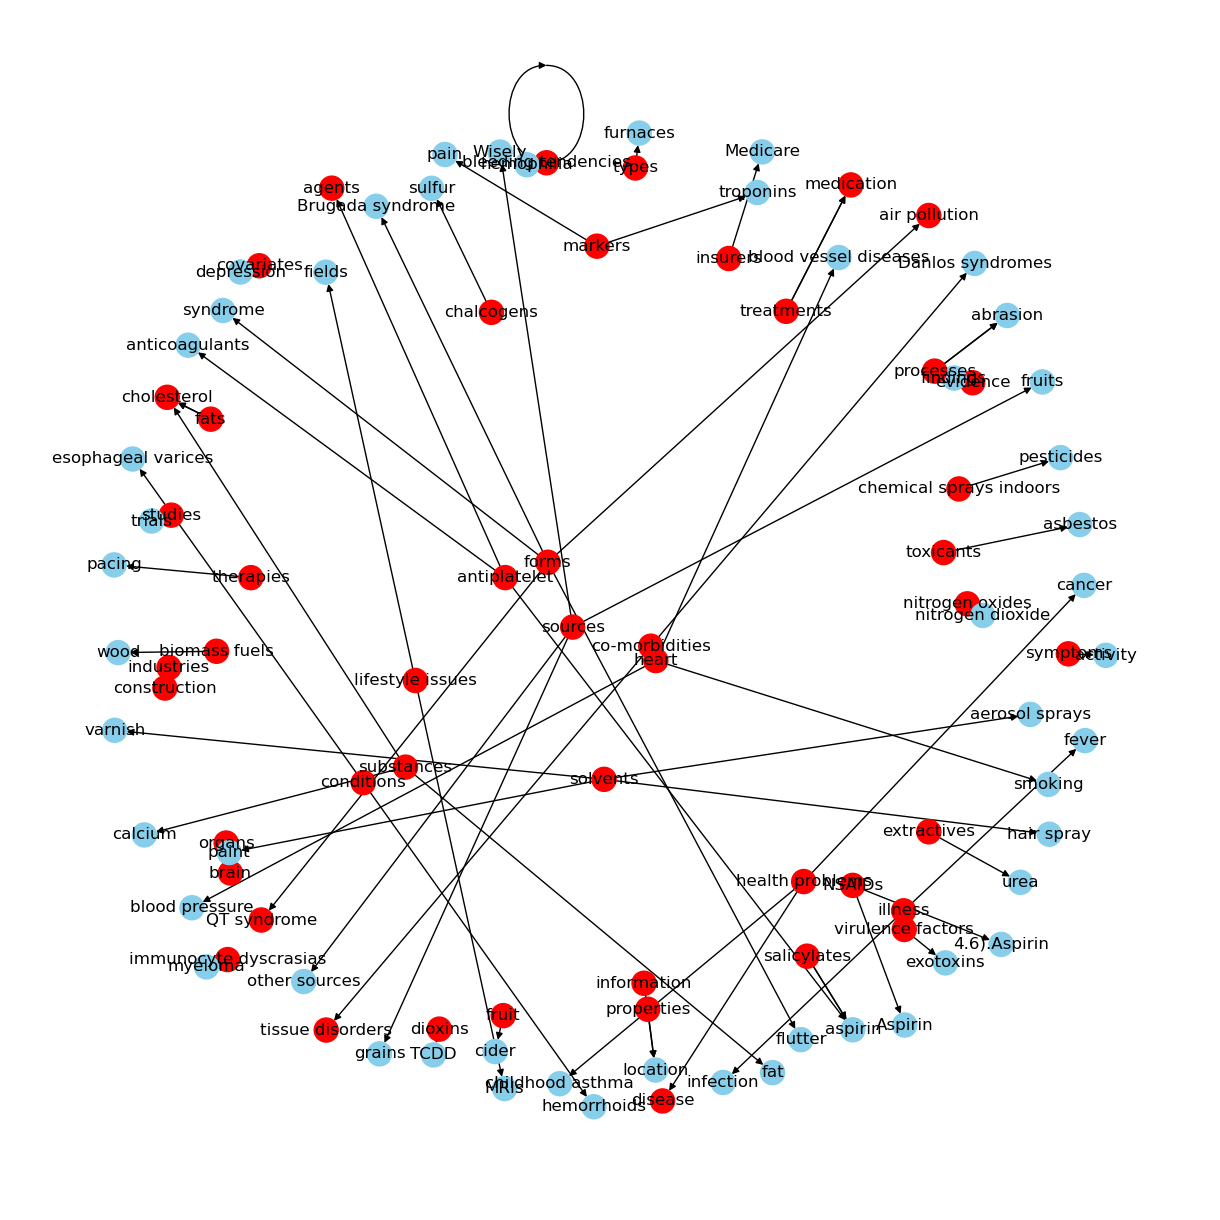

In [33]:
Knowledge_graph1=nx.from_pandas_edgelist(df[df['relation']=='other'],'source-node', 'target-node',edge_attr=True, create_using=nx.MultiDiGraph())

for n in Knowledge_graph1.nodes():
    Knowledge_graph1.nodes[n]['color'] = 'red' if n in sources else 'skyblue'
    
plt.figure(figsize=(12,12))
colors = [node[1]['color'] for node in Knowledge_graph1.nodes(data=True)]
pos = nx.spring_layout(Knowledge_graph1)
nx.draw(Knowledge_graph1, with_labels=True, node_color=colors, edge_cmap=plt.cm.Reds, pos = pos)
plt.show()